** Porto Competition**

This competition is hosted by the third largest insurance company in Brazil: [Porto Seguro](https://en.wikipedia.org/wiki/Porto_Seguro_S.A.) with the task of predicting the *probability that a driver will initiate an insurance claim in the next year.*

I will be using this notebook as reference (https://www.kaggle.com/arthurtok/interactive-porto-insights-a-plot-ly-tutorial).

The themes in this notebook can be briefly summarized follows:

**1. Data Quality Checks** - Visualising and evaluating all missing/Null values (values that are -1)

**2. Feature distributions** - Correlation plots and inspection of the Binary, categorical and other variables

**3. Feature importance ranking via learning models** - Building a Random Forest and Gradient Boosted model to help us rank features based off the learning process.

In [1]:
#load in the relevant Python modules
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Try ploty libraries
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)
import warnings

from collections import Counter
warnings.filterwarnings('ignore')

Load in the training data provided using Pandas:

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
id_test = test['id'].values
#combine = [train, test]

In [3]:
train.head()
#Note: id not sequential

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,...,4,4,3,8,0,1,0,0,0,0


In [5]:
train.shape

(595212, 59)

In [6]:
# Taking a look at how many rows and columns the train dataset contains
rows = train.shape[0]
columns = train.shape[1]
print("The train dataset contains {0} rows and {1} columns".format(rows, columns))

The train dataset contains 595212 rows and 59 columns


In [7]:
Counter(train.dtypes.values)

Counter({dtype('int64'): 49, dtype('float64'): 10})

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [9]:
pd.set_option('precision',2)
train.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.95e+05,595212.00,595212.00,595212.00,595212.00,595212.00,595212.00,595212.00,595212.00,595212.00,...,595212.00,595212.00,595212.00,595212.00,595212.00,595212.00,595212.00,595212.00,595212.00,595212.00
mean,7.44e+05,0.04,1.90,1.36,4.42,0.42,0.41,0.39,0.26,0.16,...,5.44,1.44,2.87,7.54,0.12,0.63,0.55,0.29,0.35,0.15
std,4.29e+05,0.19,1.98,0.66,2.70,0.49,1.35,0.49,0.44,0.37,...,2.33,1.20,1.69,2.75,0.33,0.48,0.50,0.45,0.48,0.36
min,7.00e+00,0.00,0.00,-1.00,0.00,-1.00,-1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.72e+05,0.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,...,4.00,1.00,2.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,7.44e+05,0.00,1.00,1.00,4.00,0.00,0.00,0.00,0.00,0.00,...,5.00,1.00,3.00,7.00,0.00,1.00,1.00,0.00,0.00,0.00
75%,1.12e+06,0.00,3.00,2.00,6.00,1.00,0.00,1.00,1.00,0.00,...,7.00,2.00,4.00,9.00,0.00,1.00,1.00,1.00,1.00,0.00
max,1.49e+06,1.00,7.00,4.00,11.00,1.00,6.00,1.00,1.00,1.00,...,19.00,10.00,13.00,23.00,1.00,1.00,1.00,1.00,1.00,1.00


As alluded to above, there are a total of 59 columns that make up the train dataset and as we can observe from this check, the features/columns consist of only two datatypes - Integer and floats. 

Another point to note is that Porto Seguro has actually provided us data with headers that come suffixed with abbreviations such as "_bin", "_cat" and "_reg", where they have given us a rough explanation that _bin indicates binary features while _cat indicates categorical features whilst the rest are either continuous or ordinal features. Here I shall simplify this a bit further just by looking at float values (probably only the continuous features) and integer datatypes (binary, categorical and ordinal features).

In [10]:
train.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


** 1. Data Quality checks**

**Null or missing values check**

As part of our quality checks, let us quick look at whether there are any null values in the train dataset as follows:

In [11]:
train.isnull().values.any().any()

False

* Our null values check returns False but however, this does not really mean that this case has been closed as the data is also described as ["Values of -1 indicate that the feature was missing from the observation"](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data).  
If there is any -1, according to the data description, it indicates the feature was missing from the observation.  So let's change it for NaN in a copy of our train.

In [12]:
train_copy = train
train_copy = train_copy.replace(-1, np.NaN)

In [13]:
train_copy.isnull().values.any().any()

True

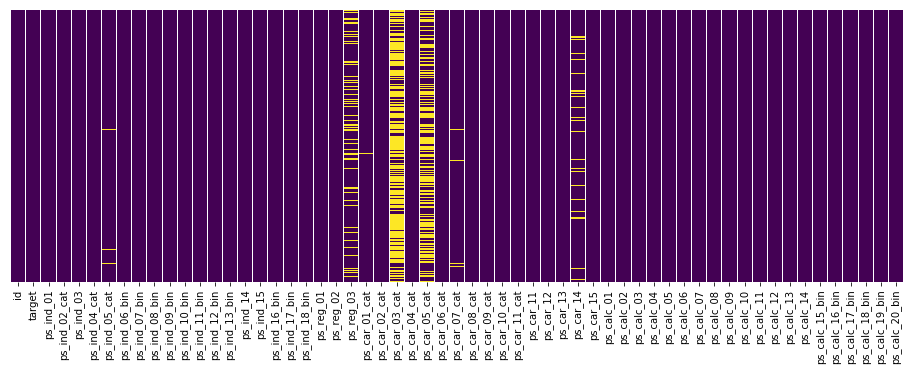

In [14]:
plt.figure(figsize = (16,5))
sns.heatmap(train_copy.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Let's see how many NaN we have in the dataset 

In [15]:
colwithnan = train_copy.columns[train_copy.isnull().any()].tolist()
print("Just a reminder this dataset has %s Rows. \n" % (train_copy.shape[0]))
for col in colwithnan:
    print("Column: %s has %s NaN" % (col, train_copy[col].isnull().sum()))

Just a reminder this dataset has 595212 Rows. 

Column: ps_ind_02_cat has 216 NaN
Column: ps_ind_04_cat has 83 NaN
Column: ps_ind_05_cat has 5809 NaN
Column: ps_reg_03 has 107772 NaN
Column: ps_car_01_cat has 107 NaN
Column: ps_car_02_cat has 5 NaN
Column: ps_car_03_cat has 411231 NaN
Column: ps_car_05_cat has 266551 NaN
Column: ps_car_07_cat has 11489 NaN
Column: ps_car_09_cat has 569 NaN
Column: ps_car_11 has 5 NaN
Column: ps_car_12 has 1 NaN
Column: ps_car_14 has 42620 NaN


In [16]:
total_null = train_copy.isnull().values.sum()
print('The dataset has ' + str(total_null) + ' null values')

The dataset has 846458 null values


As an example I can print out the 5 Nan rows for 'ps_car_11'

In [17]:
train_copy[train_copy['ps_car_11'].isnull()]

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
133828,334459,0,4,1.0,5,0.0,0.0,0,0,1,...,6,1,4,7,1,0,1,0,1,0
142554,356241,0,1,1.0,7,0.0,0.0,0,1,0,...,7,1,3,6,0,0,0,0,1,0
227030,567304,0,7,1.0,4,1.0,0.0,0,0,1,...,6,0,4,8,0,1,0,0,0,0
474546,1185902,0,0,1.0,10,0.0,0.0,0,0,0,...,6,0,6,7,0,0,1,1,0,0
533634,1333531,0,0,1.0,5,1.0,0.0,0,0,1,...,7,2,3,5,1,1,0,1,0,0


As we can see, the missing values now become much more apparent and clear when we visualise it, where the empty yellow bands (data that is missing) superposed on the vertical purple bands (non-missing data) reflect the nullity of the data in that particular column. In this instance, we can observe that there are 7 features out of the 59 total features (although as rightly pointed out by Justin Nafe in the comments section there are really a grand total of 13 columns with missing values) that actually contained null values. This is due to the fact that the heatmap plot can only comfortable fit in approximately 40 odd features to one plot after which some columns may be excluded, and hence the remaining 5 null columns have been excluded. To visualize all nulls, try changing the figsize argument as well as tweaking how we slice the dataframe.

For the 7 null columns that we are able to observe, they are hence listed here as follows:

**ps_ind_05_cat | ps_reg_03 | ps_car_03_cat | ps_car_05_cat | ps_car_07_cat | ps_car_09_cat | ps_car_14**

Most of the missing values occur in the columns suffixed with _cat. One should really take further note of the columns ps_reg_03, ps_car_03_cat and ps_car_05_cat. Evinced from the ratio of white to dark bands, it is very apparent that a big majority of values are missing from these 3 columns, and therefore a blanket replacement of -1 for the nulls might not be a very good strategy.

According to the data description, anything ending in ind, reg, car and calc are simply similar groupings. cat corresponde categorial features and anything that do not have any designations they are continous or ordinal. 

You can see clearly they don't like to include **ps_car_03_cat** and **ps_car_05_cat** on the dataset, maybe it's a formality or an optional information when you fill your assurance information, who knows at this point. Another colum with lot of missing information is **ps_reg_03**, we will need to see how the prediction goes and the feature importance for the algorithms before taking any step further.

You should have 3 types of features:

**Categorical: **Where it has two or more categories and each value in the feature can be categorised by them, for example Color, Marrital status, gender. 

**Ordinal:** It's kind of the same than categorical values, but this kind of features can be ordered or sorted between the values, for example Size, Height, range. 

**Continous: **Those features can take any value between a minimun and a maximum, for example Age, Salary,

**Target variable inspection**

Another standard check normally conducted on the data is with regards to our target variable, where in this case, the column is conveniently titled "target". The target value also comes by the moniker of class/label/correct answer and is used in supervised learning models along with the corresponding data that is given (in our case all our train data except the id column) to learn the function that best maps the data to our target in the hope that this learned function can generalize and predict well with new

In [18]:
# Get a count where Target = 1 from train dataset
train['target'].value_counts().head(5) 

0    573518
1     21694
Name: target, dtype: int64

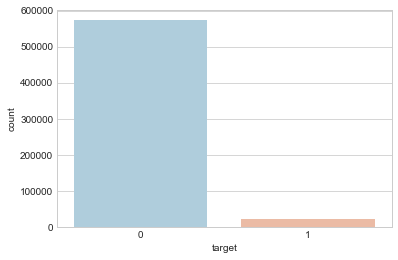

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=train,palette='RdBu_r')

In [21]:
data = [go.Bar(
            x = train["target"].value_counts().index.values,
            y = train["target"].value_counts().values,
            text='Distribution of target variable'
    )]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

You can see a big inbalance in the target, there are only a few amount of people the claim was filed. 

**Part two: Feature Inspection**
Split feature by data type.

In [22]:
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])

## Correlation plots

As a starter, let us generate some linear correlation plots just to have a quick look at how a feature is linearly correlated to the next and perhaps start gaining some insights from here. At this juncture, I will use the seaborn statistical visualisation package to plot a heatmap of the correlation values. Conveniently, Pandas dataframes come with the corr() method inbuilt, which calculates the Pearson correlation. Also as convenient is Seaborn's way of invoking a correlation plot. Just literally the word "heatmap"

**Correlation of float features**

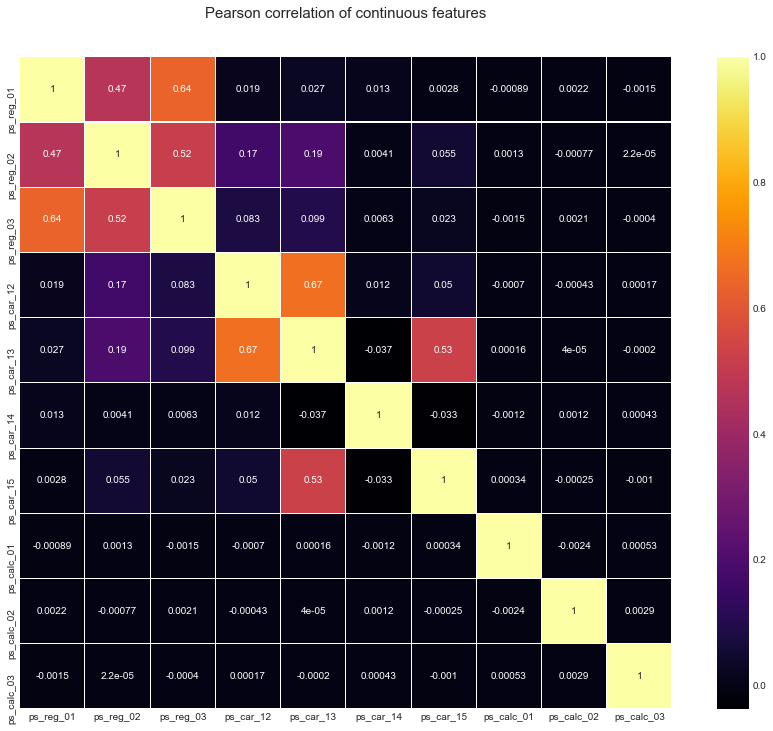

In [23]:
colormap = plt.cm.inferno
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(train_float.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

From the correlation plot, we can see that the majority of the features display zero or no correlation to one another. This is quite an interesting observation that will warrant our further investigation later down. For now, the features that display a somewhat substantial positive correlation are listed as follows:

**(ps_reg_01, ps_reg_03)**

**(ps_reg_02, ps_reg_03)**

**(ps_car_12, ps_car_13)**

**(ps_car_13, ps_car_15)**

**Correlation of integer features**

For the columns of interger datatype, I shall now switch to using the Plotly library to show how one can also generate a heatmap of correlation values interactively. Much like our earlier Plotly plot, we generate a heatmap object by simply invoking the "go.Heatmap". Here we have to provide values to three different axes, where x and y axes take in the column names while the correlation value is provided by the z-axis. The colorscale attribute takes in keywords that correspond to different color palettes that you will see in the heatmap where in this example, I have used the Greys colorscale (others include Portland and Viridis - try it for yourself). 

In [24]:
train_int = train_int.drop(["id", "target"], axis=1)
# colormap = plt.cm.bone
# plt.figure(figsize=(21,16))
# plt.title('Pearson correlation of categorical features', y=1.05, size=15)
# sns.heatmap(train_cat.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)
data = [
    go.Heatmap(
        z= train_int.corr().values,
        x=train_int.columns.values,
        y=train_int.columns.values,
        colorscale='Viridis',
        text = True ,
        opacity = 1.0 )
]

layout = go.Layout(
    title='Pearson Correlation of Integer-type features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

Similarly, we can observe that there are a huge number of columns that are not linearly correlated with each other at all, evident from the fact that we observe quite a lot of 0 value cells in our correlation plot. This is quite a useful observation to us, especially if we are trying to perform dimensionality reduction transformations such as Principal Component Analysis (PCA), this would require a certain degree of correlation  . We can note some features of interest are as follows:

***Negatively correlated features*** : ps_ind_06_bin, ps_ind_07_bin,  ps_ind_08_bin,  ps_ind_09_bin

One interesting aspect to note is that in our earlier analysis on nullity, ps_car_03_cat and ps_car_05_cat were found to contain many missing or null values. Therefore it should come as no surprise that both these features show quite a strong positive linear correlation to each other on this basis, albeit one that may not really reflect the underlying truth for the data.

You can say, since you are not seeing any correlation from ps_cal_04 to ps_calc_20_bin you can just take them away from the charts and say they are not correlated. let's replot this.

In [25]:
cotrain = train_int.drop(['ps_car_11', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin'], axis=1)
data = [
    go.Heatmap(
        z= cotrain.corr().values,
        x=cotrain.columns.values,
        y=cotrain.columns.values,
        colorscale='Viridis',
        text = True ,
        opacity = 1.0 )
]

layout = go.Layout(
    title='Pearson correlation of int features without ps_calc',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

We can see with more detail the features that are correlated and negative correlated:

* ps_ind_06_bin and 07 are ngative corrleated -0.47
* ps_ind_11_bin ps_ind_14 =  0.56
* ps_ind_12_bin with ps_ind_14 = 0.89
* ps_ind_13_bin with ps_ind_14 = 0.43 (just because 14 is related to the others)
* ps_ind_17_bin with ps_ind_16_bin -0.52
* ps_ind_18_bin with ps_ind_16_bin -0.59
* ps_ind_18_bin with ps_ind_15 -0.4

Let's dig into the continous features, and see if we find something interesting.

In [26]:
train_float.describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.00,595212.00,595212.00,595212.00,595212.00,595212.00,595212.00,595212.00,595212.00,595212.00
mean,0.61,0.44,0.55,0.38,0.81,0.28,3.07,0.45,0.45,0.45
std,0.29,0.40,0.79,0.06,0.22,0.36,0.73,0.29,0.29,0.29
min,0.00,0.00,-1.00,-1.00,0.25,-1.00,0.00,0.00,0.00,0.00
25%,0.40,0.20,0.53,0.32,0.67,0.33,2.83,0.20,0.20,0.20
50%,0.70,0.30,0.72,0.37,0.77,0.37,3.32,0.50,0.40,0.50
75%,0.90,0.60,1.00,0.40,0.91,0.40,3.61,0.70,0.70,0.70
max,0.90,1.80,4.04,1.26,3.72,0.64,3.74,0.90,0.90,0.90


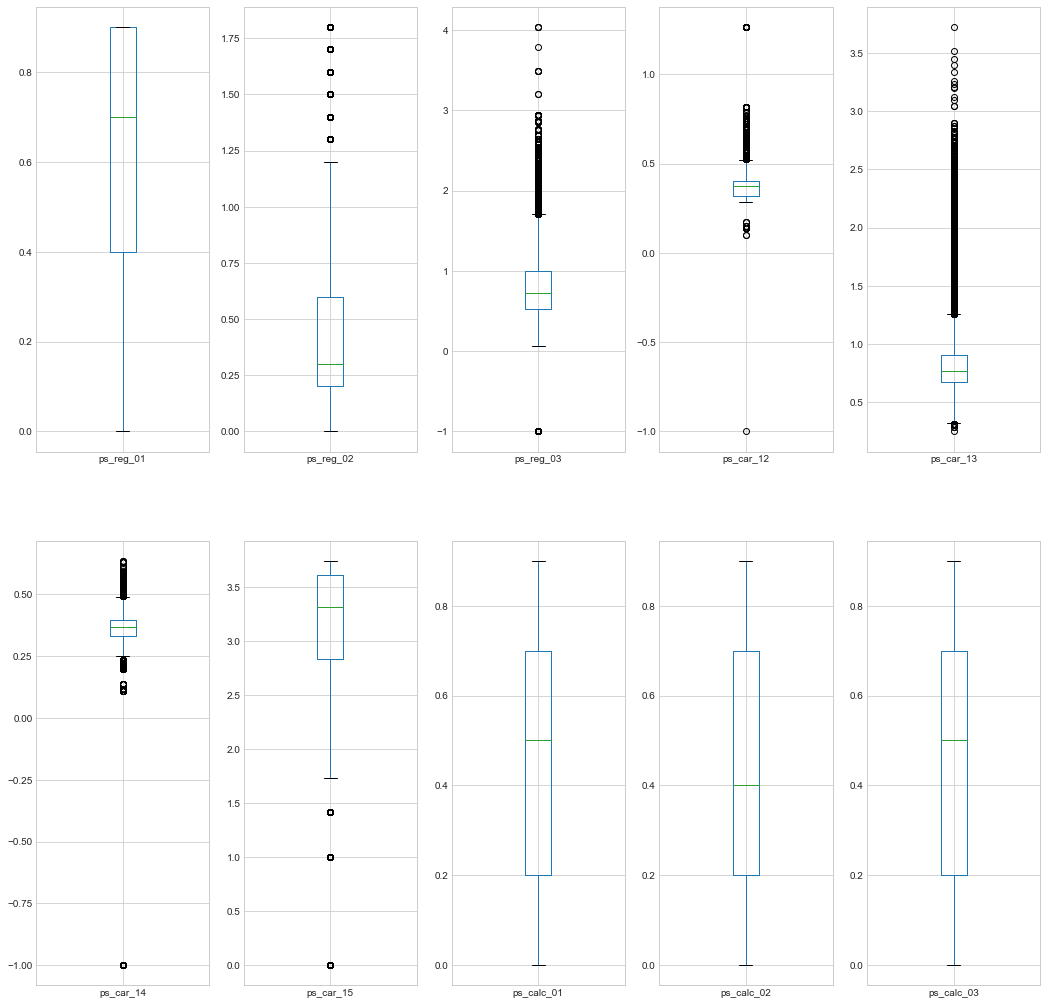

In [27]:
train_float.plot(kind='box', subplots=True, layout=(2,5), sharey=False, figsize=(18,18))
plt.show()

We have real meaningfull information about the float features, in some cases the data is spread out, in some others not that much, I guess standarization will help a little bit for some particulars algorithms, but I guess is still early stages to say that.

In [28]:
#train_int = train_int.drop(['id', 'target'], axis=1)
train_int.describe()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.00,595212.00,595212.00,595212.00,595212.00,595212.00,595212.00,595212.00,595212.00,5.95e+05,...,595212.00,595212.00,595212.00,595212.00,595212.00,595212.00,595212.00,595212.00,595212.00,595212.00
mean,1.90,1.36,4.42,0.42,0.41,0.39,0.26,0.16,0.19,3.73e-04,...,5.44,1.44,2.87,7.54,0.12,0.63,0.55,0.29,0.35,0.15
std,1.98,0.66,2.70,0.49,1.35,0.49,0.44,0.37,0.39,1.93e-02,...,2.33,1.20,1.69,2.75,0.33,0.48,0.50,0.45,0.48,0.36
min,0.00,-1.00,0.00,-1.00,-1.00,0.00,0.00,0.00,0.00,0.00e+00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,...,4.00,1.00,2.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,1.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,...,5.00,1.00,3.00,7.00,0.00,1.00,1.00,0.00,0.00,0.00
75%,3.00,2.00,6.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00e+00,...,7.00,2.00,4.00,9.00,0.00,1.00,1.00,1.00,1.00,0.00
max,7.00,4.00,11.00,1.00,6.00,1.00,1.00,1.00,1.00,1.00e+00,...,19.00,10.00,13.00,23.00,1.00,1.00,1.00,1.00,1.00,1.00


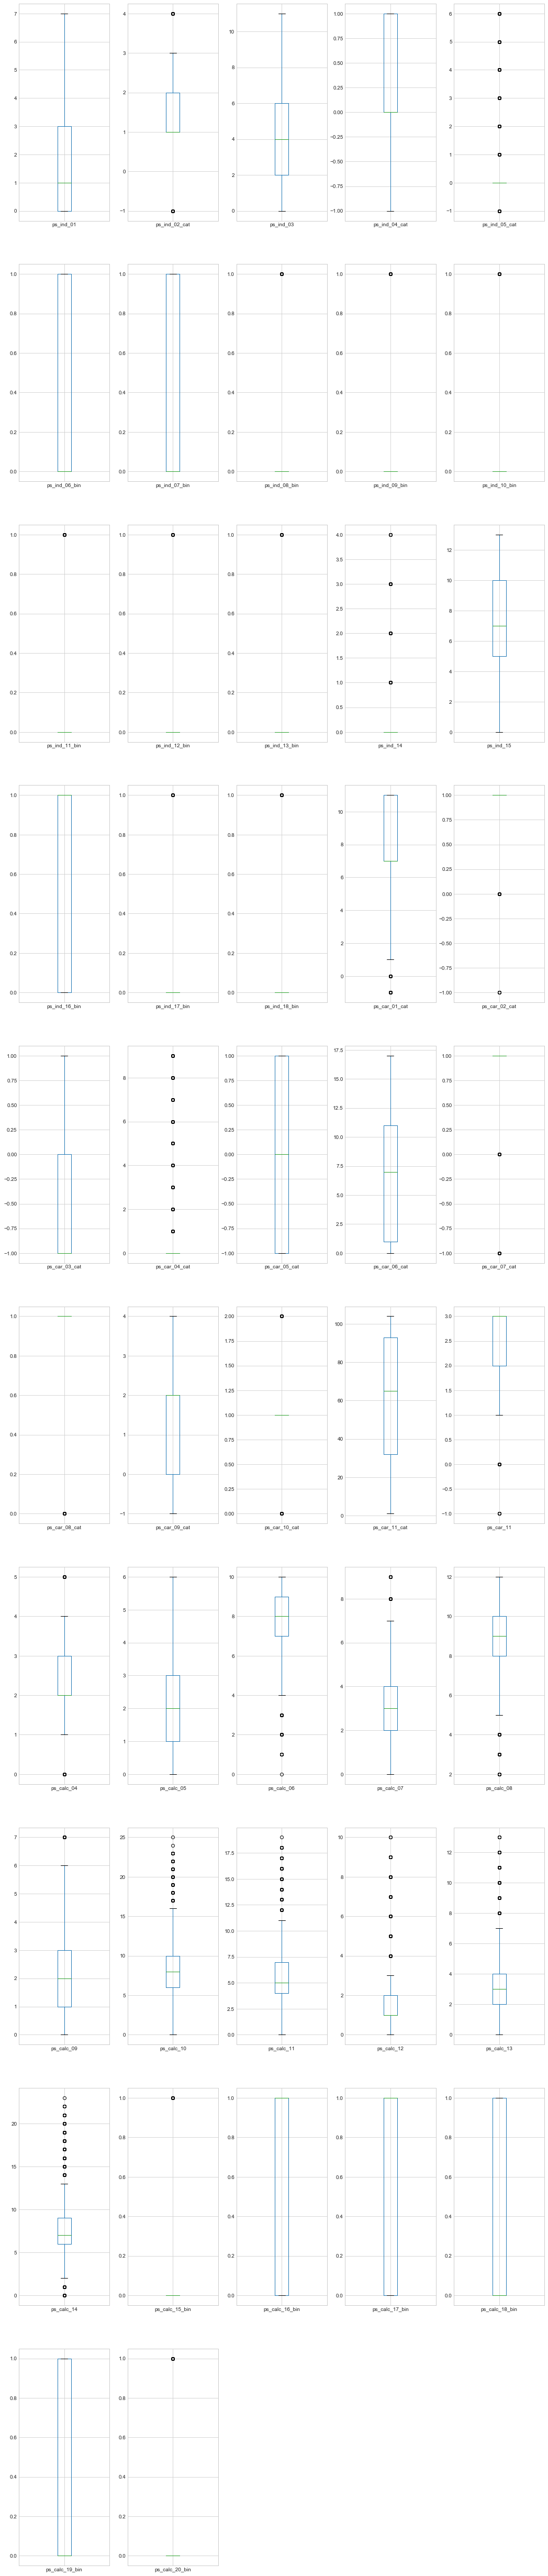

In [29]:
# This section of code takes forever to execute!!
train_int.plot(kind='box', subplots=True, layout=(10,5), sharey=False, figsize=(18,90))
plt.show()


This one is the most important output of this notebook, you can see right away there are some features really spread out, and others with high values, I maybe goig to produce another graphic where I kind of standarize the outputs, or I can classify them by the Y (range).  I mean you can see there are features between 0 and 1 but, you can also see there are features between 6-10, or 1-3, 8-10, etc etc. 

It's almost sure that I will go back and do more with this features before the final model.

As alluded to above, there are a total of 59 columns that make up the train dataset and as we can observe from this check, the features/columns consist of only two datatypes - Integer and floats. 

Another point to note is that Porto Seguro has actually provided us data with headers that come suffixed with abbreviations such as "_bin", "_cat" and "_reg", where they have given us a rough explanation that _bin indicates binary features while _cat indicates categorical features whilst the rest are either continuous or ordinal features. Here I shall simplify this a bit further just by looking at float values (probably only the continuous features) and integer datatypes (binary, categorical and ordinal features).

** Binary features inspection**

Another aspect of the data that we may want to inspect would be the columns that only contain binary values, i.e where values take on only either of the two values 1 or 0. Proceeding, we store all columns that contain these binary values and then generate a vertical plotly barplot of these binary values as follows:

In [30]:
bin_col = [col for col in train.columns if '_bin' in col]
zero_list = []
one_list = []
for col in bin_col:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==1).sum())

In [31]:
trace1 = go.Bar(
    x=bin_col,
    y=zero_list ,
    name='Zero count'
)
trace2 = go.Bar(
    x=bin_col,
    y=one_list,
    name='One count'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title='Count of 1 and 0 in binary variables'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

Here we observe that there are 4 features : ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin which are completely dominated by zeros. This begs the question of whether these features are useful at all as they do not contain much information about the other class vis-a-vis the target.

## Analyze by pivoting features

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other.

In [32]:
train.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [33]:
train[['target','ps_calc_20_bin']].groupby(['target'], as_index=False).count()

,target,ps_calc_20_bin
0,0,573518
1,1,21694


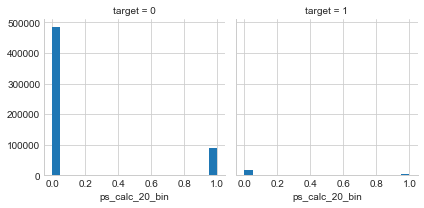

In [34]:
g = sns.FacetGrid(train, col='target')
g.map(plt.hist, 'ps_calc_20_bin', bins=20)

In [35]:
train['target'].value_counts()

0    573518
1     21694
Name: target, dtype: int64